In [7]:
import pandas as pd
import pandas_gbq
from google.cloud import bigquery
%load_ext google.cloud.bigquery
# Set your default project here
pandas_gbq.context.project = 'bigquery-public-data'
pandas_gbq.context.dialect = 'standard'

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [8]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\pravd\Downloads\unacast-334100-f70d949ff84e.json"

In [9]:
%%bigquery
SELECT *
FROM `bigquery-public-data.new_york_citibike.citibike_stations`


Downloading: 100%|██████████████████████████████████████████████████████████████| 1584/1584 [00:02<00:00, 561.69rows/s]


,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,247,Perry St & Bleecker St,5922.07,40.735354,-74.004831,71.0,"CREDITCARD,KEY",79,False,76,1,2,0,True,True,True,False,2021-11-09
1580,3122,48 Ave & 5 St,6212.04,40.744363,-73.955873,71.0,"CREDITCARD,KEY",79,False,76,0,3,0,True,True,True,False,2021-11-09
1581,4406,E 11 St & 3 Ave,5788.16,40.731270,-73.988490,71.0,"CREDITCARD,KEY",80,False,76,1,3,0,True,True,True,False,2021-11-09
1582,361,Allen St & Hester St,5342.10,40.716059,-73.991908,71.0,"CREDITCARD,KEY",79,False,78,1,0,0,True,True,True,False,2021-11-09


In [10]:
bqclient = bigquery.Client()

In [11]:
query_string = """ SELECT * FROM `bigquery-public-data.new_york_citibike.citibike_stations`"""

In [12]:
df = bqclient.query(query_string).to_dataframe()
print(df.count())
df.head()

station_id                   1584
name                         1584
short_name                   1584
latitude                     1584
longitude                    1584
region_id                    1578
rental_methods               1584
capacity                     1584
eightd_has_key_dispenser     1584
num_bikes_available          1584
num_bikes_disabled           1584
num_docks_available          1584
num_docks_disabled           1584
is_installed                 1584
is_renting                   1584
is_returning                 1584
eightd_has_available_keys    1584
last_reported                1584
dtype: int64


,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   station_id                 1584 non-null   int64         
 1   name                       1584 non-null   object        
 2   short_name                 1584 non-null   object        
 3   latitude                   1584 non-null   float64       
 4   longitude                  1584 non-null   float64       
 5   region_id                  1578 non-null   float64       
 6   rental_methods             1584 non-null   object        
 7   capacity                   1584 non-null   int64         
 8   eightd_has_key_dispenser   1584 non-null   bool          
 9   num_bikes_available        1584 non-null   int64         
 10  num_bikes_disabled         1584 non-null   int64         
 11  num_docks_available        1584 non-null   int64         
 12  num_do

In [14]:
df.isnull().values.any()

True

In [15]:
df.describe()

,station_id,latitude,longitude,region_id,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled
count,1584.000000,1584.000000,1584.000000,1578.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,3330.566919,40.752561,-73.958292,75.072877,29.929924,14.527146,1.190657,14.060606,0.222222
std,1356.614557,0.061021,0.040638,31.138578,14.233883,14.434658,2.336832,11.951740,3.308881
min,72.000000,40.633385,-74.086701,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3213.750000,40.703973,-73.988796,71.000000,21.000000,3.000000,0.000000,4.000000,0.000000
50%,3777.500000,40.747329,-73.956118,71.000000,25.000000,11.000000,1.000000,13.000000,0.000000
75%,4228.250000,40.805577,-73.923710,71.000000,35.000000,21.000000,2.000000,20.000000,0.000000
max,4683.000000,40.882260,-73.881450,311.000000,91.000000,79.000000,57.000000,77.000000,100.000000


In [16]:
df.shape

(1584, 18)

In [17]:
df["region_id"].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   station_id                 1584 non-null   int64         
 1   name                       1584 non-null   object        
 2   short_name                 1584 non-null   object        
 3   latitude                   1584 non-null   float64       
 4   longitude                  1584 non-null   float64       
 5   region_id                  1584 non-null   float64       
 6   rental_methods             1584 non-null   object        
 7   capacity                   1584 non-null   int64         
 8   eightd_has_key_dispenser   1584 non-null   bool          
 9   num_bikes_available        1584 non-null   int64         
 10  num_bikes_disabled         1584 non-null   int64         
 11  num_docks_available        1584 non-null   int64         
 12  num_do

In [18]:
duplicateValues = df.duplicated()
print(duplicateValues.sum())

0


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split

<AxesSubplot:>

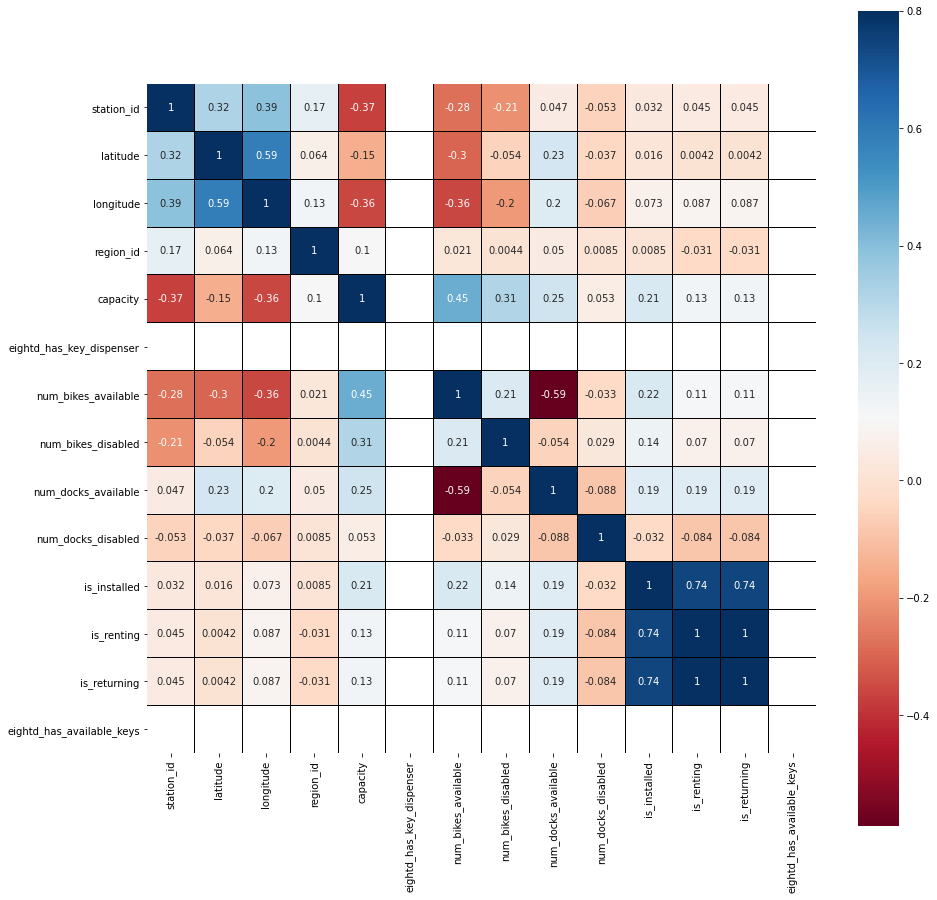

In [20]:
corr=df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')

In [21]:
#Dropping two columns eightd_has_available_keys and eightd_has_key_dispenser, set axis as 1 to drop columns and inplace True to make changes in the original df

df.drop(['eightd_has_available_keys', 'eightd_has_key_dispenser'], axis = 1,inplace = True)

In [22]:
df.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,0,0,0,0,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,0,0,0,0,True,True,True,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,0,0,0,0,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,0,0,0,0,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,0,0,0,0,False,False,False,1970-01-01


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   station_id           1584 non-null   int64         
 1   name                 1584 non-null   object        
 2   short_name           1584 non-null   object        
 3   latitude             1584 non-null   float64       
 4   longitude            1584 non-null   float64       
 5   region_id            1584 non-null   float64       
 6   rental_methods       1584 non-null   object        
 7   capacity             1584 non-null   int64         
 8   num_bikes_available  1584 non-null   int64         
 9   num_bikes_disabled   1584 non-null   int64         
 10  num_docks_available  1584 non-null   int64         
 11  num_docks_disabled   1584 non-null   int64         
 12  is_installed         1584 non-null   bool          
 13  is_renting           1584 non-nul

Will start analysing the questions from work sheet before that will run some initial queries:

1. Report empty stations

In [24]:
%%bigquery
SELECT name, capacity, num_docks_available FROM `bigquery-public-data.new_york_citibike.citibike_stations` WHERE num_bikes_available = 0 and is_renting = True

Downloading: 100%|█████████████████████████████████████████████████████████████████| 113/113 [00:02<00:00, 39.84rows/s]


,name,capacity,num_docks_available
0,Spruce St & Nassau St,0,0
1,Putnam Ave & Throop Ave,0,0
2,Central Park West & W 72 St,0,0
3,E 58 St & Madison Ave,0,0
4,E 116 St & 2 Ave,0,0
...,...,...,...
108,W 55 St & 6 Ave,53,50
109,E 40 St & 5 Ave,63,61
110,Grand Army Plaza & Central Park S,66,66
111,E 40 St & Park Ave,76,72


In [25]:
%%bigquery
SELECT * FROM `bigquery-public-data.new_york_citibike.citibike_trips`

Downloading: 100%|███████████████████████████████████████████████████| 58937715/58937715 [08:32<00:00, 114955.32rows/s]


,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,339.0,2016-01-11 17:53:10.000,2016-01-11 17:58:49.000,546.0,E 30 St & Park Ave S,40.744449,-73.983035,379.0,W 31 St & 7 Ave,40.749156,-73.991600,21289.0,Subscriber,1957.0,male,
1,1300.0,2015-11-21 17:44:21.000,2015-11-21 18:06:02.000,520.0,W 52 St & 5 Ave,40.759923,-73.976485,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,16988.0,Subscriber,1957.0,male,
2,172.0,2018-02-19 08:03:03.973,2018-02-19 08:05:56.266,3175.0,W 70 St & Amsterdam Ave,40.777480,-73.982886,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,20331.0,Subscriber,1957.0,female,
3,1492.0,2018-05-08 07:19:49.663,2018-05-08 07:44:41.795,439.0,E 4 St & 2 Ave,40.726281,-73.989780,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,32696.0,Subscriber,1957.0,male,
4,624.0,2014-04-22 17:48:34.000,2014-04-22 17:58:58.000,464.0,E 56 St & 3 Ave,40.759345,-73.967597,476.0,E 31 St & 3 Ave,40.743943,-73.979661,21662.0,Subscriber,1957.0,male,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58937710,NaN,NaT,NaT,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,,
58937711,NaN,NaT,NaT,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,,
58937712,NaN,NaT,NaT,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,,
58937713,NaN,NaT,NaT,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,,


In [27]:
#get the data from citybike trip table and convert it into dataframe
bqclient = bigquery.Client()
query_string_2 =  """ SELECT * FROM `bigquery-public-data.new_york_citibike.citibike_trips`"""
df_trips = bqclient.query(query_string_2).to_dataframe()

In [28]:
df_trips.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,836.0,2017-04-02 16:19:45,2017-04-02 16:33:41,3159.0,W 67 St & Broadway,40.774925,-73.982666,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,18869.0,Subscriber,1955.0,female,
1,108.0,2016-05-24 09:37:50,2016-05-24 09:39:38,3131.0,E 68 St & 3 Ave,40.767128,-73.962246,3141.0,1 Ave & E 68 St,40.765005,-73.958185,22244.0,Subscriber,1955.0,female,
2,2587.0,2016-08-28 15:38:06,2016-08-28 16:21:13,3265.0,E 2 St & 2 Ave,40.724563,-73.989444,265.0,Stanton St & Chrystie St,40.722293,-73.991475,18539.0,Subscriber,1955.0,male,
3,1888.0,2017-08-27 18:18:19,2017-08-27 18:49:47,3435.0,Grand St & Elizabeth St,40.718822,-73.995960,480.0,W 53 St & 10 Ave,40.766697,-73.990617,26716.0,Subscriber,1955.0,male,
4,146.0,2015-10-20 10:11:36,2015-10-20 10:14:03,347.0,Greenwich St & W Houston St,40.728846,-74.008591,358.0,Christopher St & Greenwich St,40.732916,-74.007114,22514.0,Subscriber,1955.0,male,


In [87]:
#checking data info
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58937715 entries, 0 to 58937714
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             float64       
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bikeid                   float64       
 12  usertype                 object        
 13  birth_year               float64       
 14  gender                   object        
 15  customer_plan            object        
dtypes: datetime64[ns](2), float64(9), object(5)
memory usage: 7.0+ GB


In [88]:
#check if there is any entries with null values
df_trips.isnull().values.any()

True

In [90]:
#total number of null entries
df_trips.isnull().values.sum()

69693325

In [ ]:
#check if any duplicates
duplicateValues = df_trips.duplicated()
print(duplicateValues.sum())

In [30]:
#drop all duplicates
df_trips.drop_duplicates(inplace=True)

In [5]:
#check with the oldest and latest entries in data content
%%bigquery
SELECT max(starttime), min(starttime) FROM `bigquery-public-data.new_york_citibike.citibike_trips`

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.92s/rows]


,f0_,f1_
0,2018-05-31 23:59:59.606,2013-07-01
